<a href="https://colab.research.google.com/github/mushahidq/py_colour_identifier/blob/main/colour_identifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import libraries
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import cv2
from collections import Counter
from skimage.color import rgb2lab, deltaE_cie76
import os

#Display the output of matplotlib inline
%matplotlib inline

In [ ]:
# Reading Images
def get_img(img_path):
    img = cv2.imread(img_path)
    #Information about how the image is stored
    #print("The image is stored as {}".format(type(img)))
    #print("The shape of the numpy array that stores the image is {}".format(img.shape))
    #print("The image is:")
    #plt.imshow(img)
    #Convert the image to original colors i.e. RGB
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    return img

In [ ]:
#Define the HEX values of colours
def RGB2HEX(color):
    return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))

In [ ]:
#Returns the colours in the image
def get_colours(img_path, no_of_colours, show_chart):
    img = get_img(img_path)
    #Reduce image size to reduce the execution time
    mod_img = cv2.resize(img, (600, 400), interpolation = cv2.INTER_AREA)
    #Reduce the input to two dimensions for KMeans
    mod_img = mod_img.reshape(mod_img.shape[0]*mod_img.shape[1], 3)

    #Define the clusters
    clf = KMeans(n_clusters = no_of_colours)
    labels = clf.fit_predict(mod_img)

    counts = Counter(labels)
    counts = dict(sorted(counts.items()))

    center_colours = clf.cluster_centers_
    ordered_colours = [center_colours[i] for i in counts.keys()]
    hex_colours = [RGB2HEX(ordered_colours[i]) for i in counts.keys()]
    rgb_colours = [ordered_colours[i] for i in counts.keys()]

    if (show_chart):
        plt.figure(figsize = (8, 6))
        plt.pie(counts.values(), labels = hex_colours, colors = hex_colours)
        return
    else:
        return rgb_colours

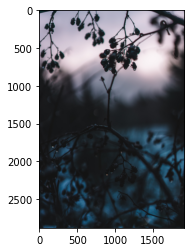

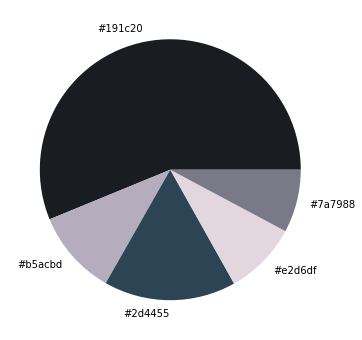

In [ ]:
get_colours('/content/drive/MyDrive/images/1.jpg', 5, True)

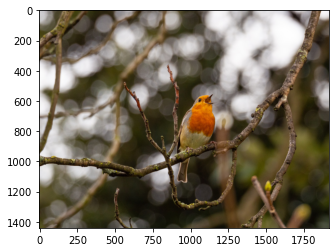

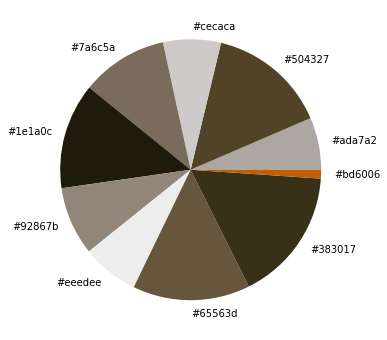

In [ ]:
get_colours('/content/drive/MyDrive/images/2.jpg', 10, True)

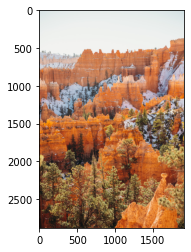

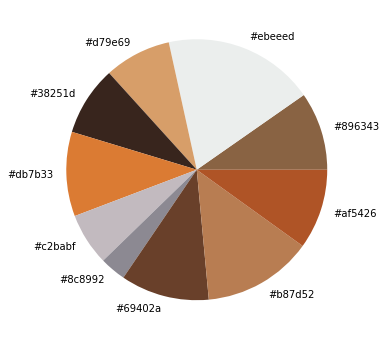

In [ ]:
get_colours('/content/drive/MyDrive/images/3.jpg', 10, True)

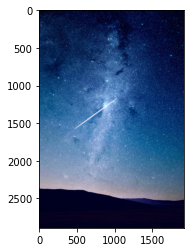

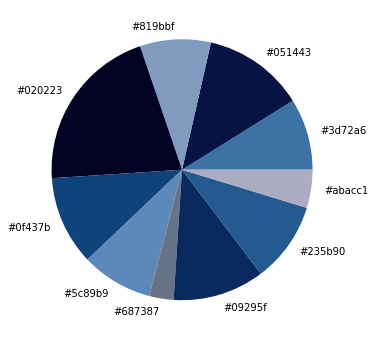

In [ ]:
get_colours('/content/drive/MyDrive/images/4.jpg', 10, True)

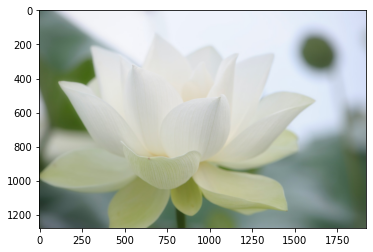

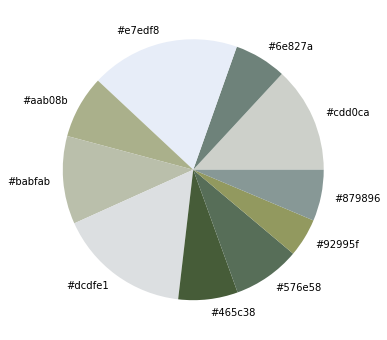

In [ ]:
get_colours('/content/drive/MyDrive/images/5.jpg', 10, True)

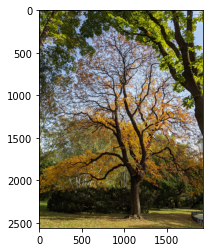

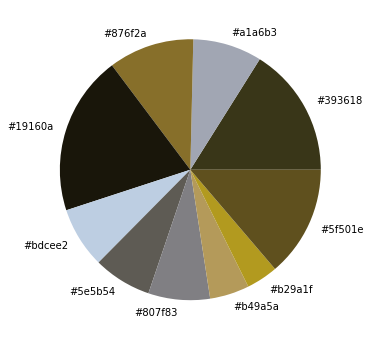

In [ ]:
get_colours('/content/drive/MyDrive/images/6.jpg', 10, True)

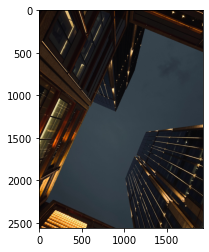

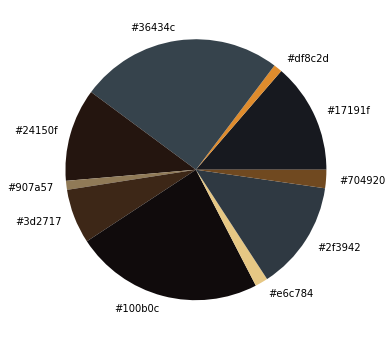

In [ ]:
get_colours('/content/drive/MyDrive/images/7.jpg', 10, True)

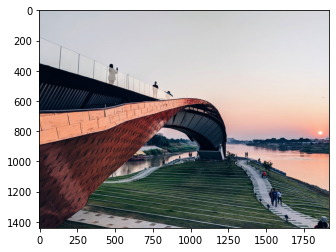

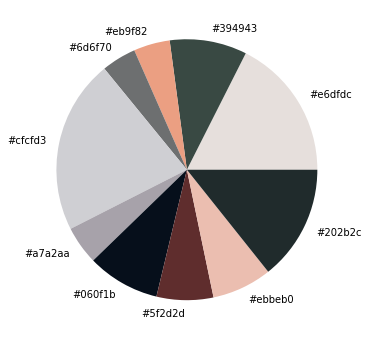

In [ ]:
get_colours('/content/drive/MyDrive/images/8.jpg', 10, True)

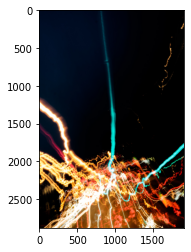

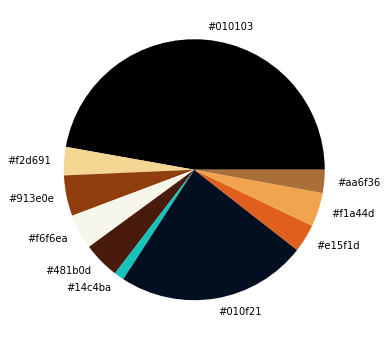

In [ ]:
get_colours('/content/drive/MyDrive/images/9.jpg', 10, True)

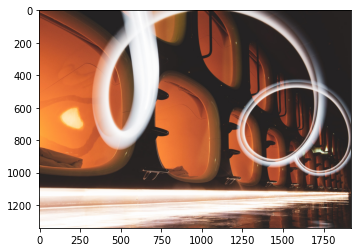

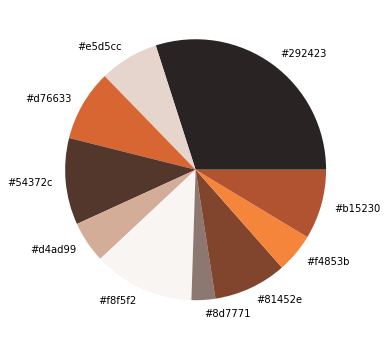

In [ ]:
get_colours('/content/drive/MyDrive/images/10.jpg', 10, True)